In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
files = [
    "data/cotacoes_altas.txt",
    "data/cotacoes_baixas.txt"
]

cols = ["Ticker", "Nome", "Preco", "Var_dia", "Var_12m", "Setor"]
dfs = []

for path in files:
    df_temp = pd.read_csv(path, header=None, names=cols)
    dfs.append(df_temp)

In [21]:
df = pd.concat(dfs, ignore_index=True)

df["Preco"]   = pd.to_numeric(df["Preco"],   errors="coerce")
df["Var_dia"] = pd.to_numeric(df["Var_dia"], errors="coerce")
df["Var_12m"] = pd.to_numeric(df["Var_12m"], errors="coerce")
df["Tipo"] = df["Var_dia"].apply(lambda x: "Alta" if x > 0 else "Baixa")

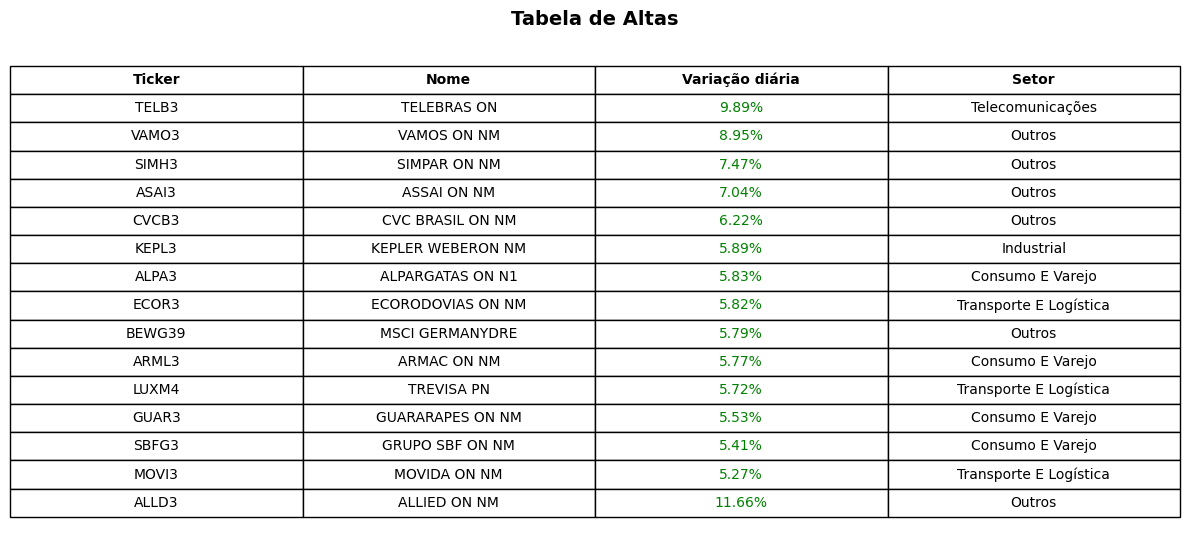

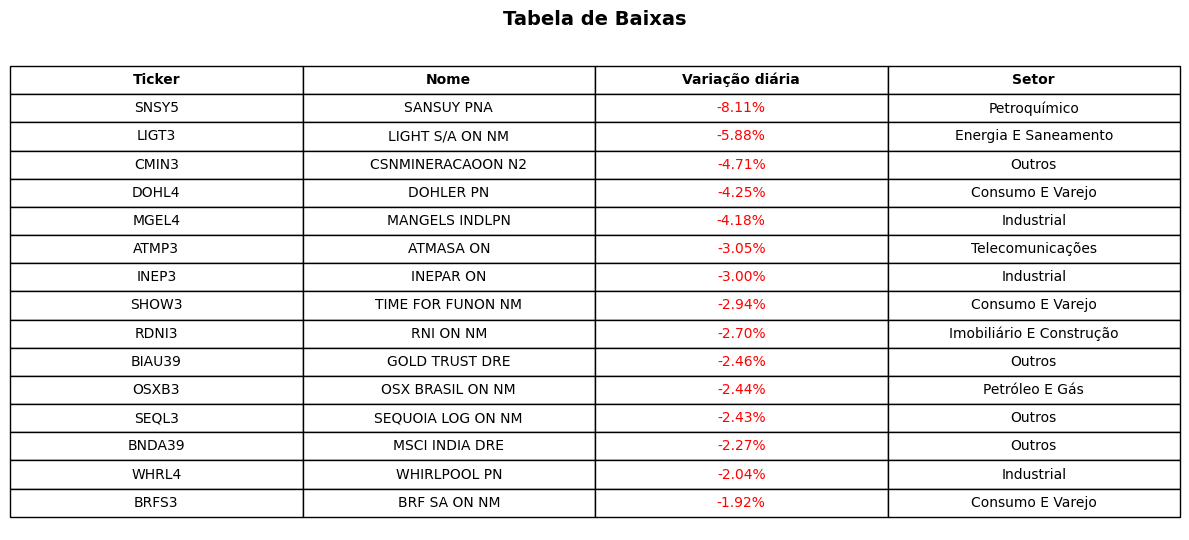

In [ ]:
tabela = df[['Ticker', 'Nome', 'Var_dia', 'Setor']].copy()
tabela.rename(columns={'Var_dia': 'Variação diária'}, inplace=True)
tabela['Variação diária'] = tabela['Variação diária'].map(lambda x: f"{x:.2f}%")

# Dividir em altas e baixas
altas = tabela[tabela['Variação diária'].str.startswith('-') == False].sort_values(by='Variação diária', ascending=False)
baixas = tabela[tabela['Variação diária'].str.startswith('-')].sort_values(by='Variação diária', ascending=False)

def plot_table(data, filename, title):
    fig, ax = plt.subplots(figsize=(12, len(data)*0.3 + 1))
    ax.axis('off')

    # Criar tabela
    tbl = ax.table(cellText=data.values,
                   colLabels=data.columns,
                   cellLoc='center',
                   loc='center')

    # Fonte e escala
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.5)

    # Negrito no cabeçalho
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.get_text().set_fontweight('bold')

    # Colorir variação diária
    for i, val in enumerate(data['Variação diária']):
        color = 'green' if not val.startswith('-') else 'red'
        tbl[(i+1, 2)].get_text().set_color(color)  # Coluna 2 = Variação diária

    # Título centralizado
    plt.title(title, fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plotar alta
plot_table(altas, 'data/tabela_altas.png', 'Tabela de Altas')

# Plotar baixa
plot_table(baixas, 'data/tabela_baixas.png', 'Tabela de Baixas')

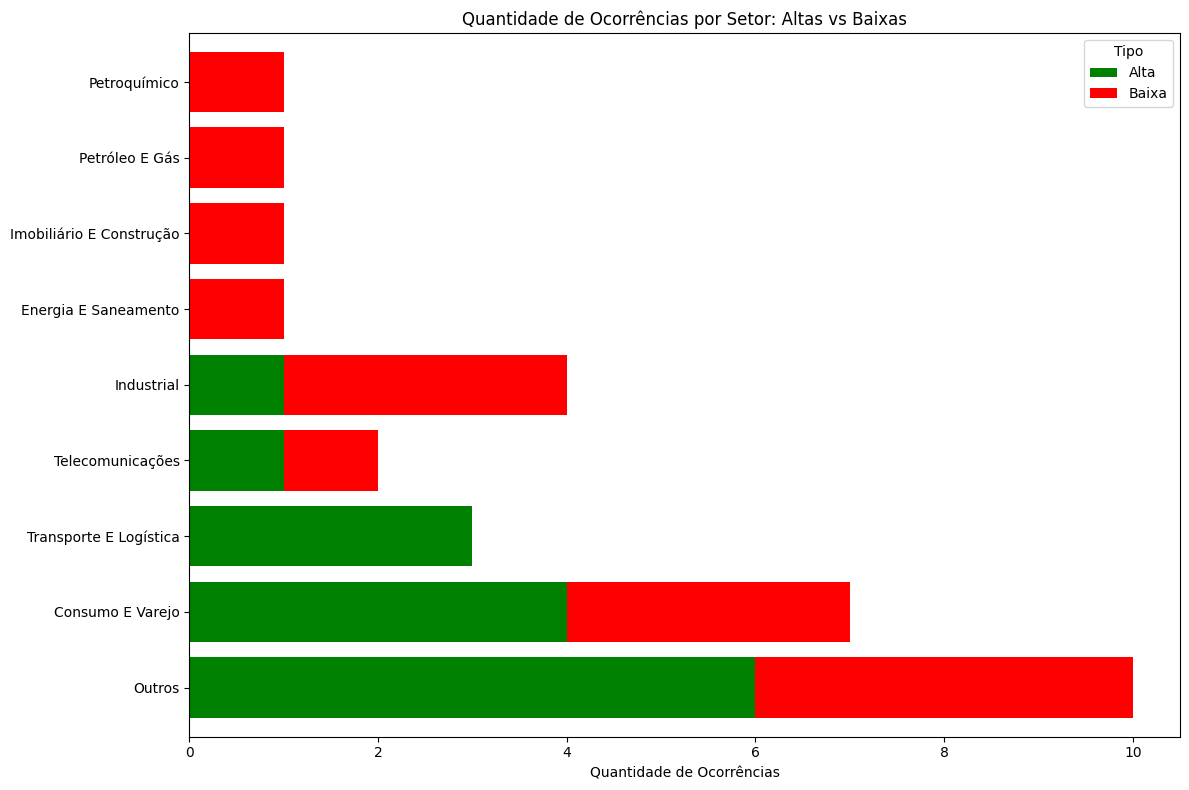

In [ ]:
# number of occurrences by sector 
contagem = df.groupby(["Setor", "Tipo"]).size().unstack(fill_value=0)
contagem = contagem.sort_values(by="Alta", ascending=False)

ax = contagem.plot.barh(stacked=True, color=["green", "red"], figsize=(12,8), width=0.8)
ax.set_title("Quantidade de Ocorrências por Setor: Altas vs Baixas")
ax.set_xlabel("Quantidade de Ocorrências")
ax.set_ylabel("")
plt.tight_layout()
plt.savefig("data/grafico_ocorrencias.png", dpi=300)
plt.show()